## Introduction

The goal of this project is to implement a **Simple Linear Regression** model to predict **Salary** based on **Years of Experience**.  
Simple Linear Regression is one of the fundamental techniques in machine learning that models the relationship between a single independent variable (X) and a dependent variable (Y) using a straight line.

In this project:
- Data is loaded from a CSV file named `Salary_Data.csv`.
- Independent variable: `YearsExperience`
- Dependent variable: `Salary`
- Objective: Find the relationship between years of experience and salary, and use it to predict the salary of new individuals based on their work experience.

This analysis can help both employers and job seekers to get a general estimate of salary based on work experience.


## Importing Libraries

In this section, we import the required libraries for data loading, visualization, and building the regression model.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression   

## Loading the Dataset

In this step, we will load the dataset from the CSV file and display the first few rows to understand its structure.



In [4]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Checking the Shape of the Dataset

We can use the `.shape` attribute to find out the number of rows and columns in the dataset.


In [5]:
df.shape

(30, 2)

## Checking for Missing Values

We can use `.isnull().sum()` to check if there are any missing values in each column of the dataset.



In [6]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Defining Features (X) and Target (y)

We will now separate our dataset into:
- **X**: The independent variable(s) (features) used to predict the target.
- **y**: The dependent variable (target) we want to predict.

In this dataset:
- Feature: `YearsExperience`
- Target: `Salary`


In [7]:
x = df.iloc[:, :1].values
y = df.iloc[:, -1].values

## Training the Simple Linear Regression Model

Now we will:
1. Split the dataset into training and testing sets.
2. Create a `LinearRegression` model.
3. Train the model using the training data.



In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Making Predictions and Evaluating the Model

After training the model, we will:
1. Make predictions on the test set.
2. Evaluate the model's performance using:
   - **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
   - **R² Score**: Represents how well the model explains the variability of the target variable.



In [9]:
y_prediction = model.predict(x_test)

mse  = mean_squared_error(y_test,y_prediction)
r2 = r2_score(y_test,y_prediction)

print(f'your mean squared error is : ', mse )
print(f'your r2_score is :', r2)

your mean squared error is :  49830096.85590839
your r2_score is : 0.9024461774180497


## Visualizing the Regression Line

We will plot:
- The **actual data points** (scatter plot)
- The **predicted regression line** (line plot)

This helps to visually understand how well the regression line fits the data.


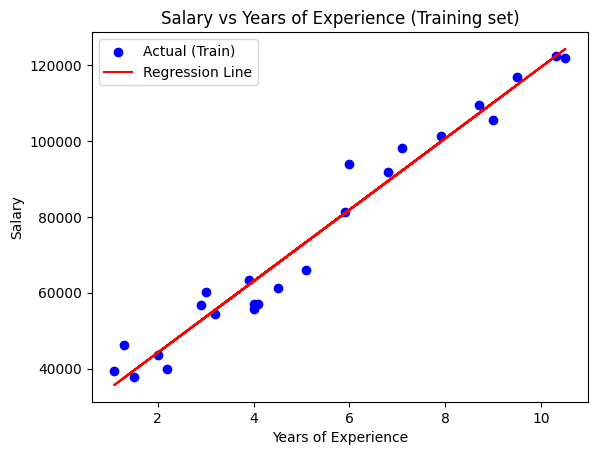

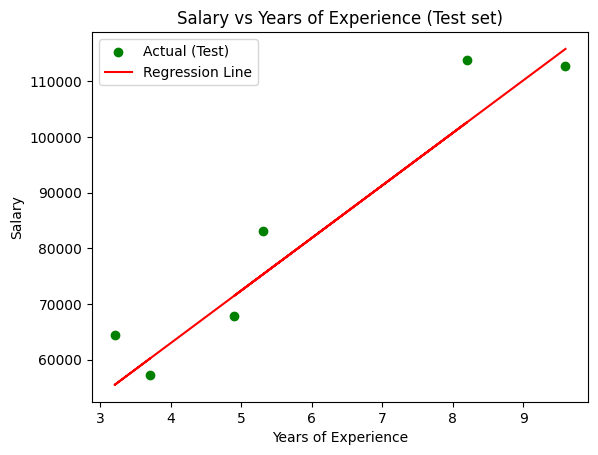

In [10]:
# Plot the training set results
plt.scatter(x_train, y_train, color='blue', label='Actual (Train)')
plt.plot(x_train, model.predict(x_train), color='red', label='Regression Line')
plt.title('Salary vs Years of Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Plot the test set results
plt.scatter(x_test, y_test, color='green', label='Actual (Test)')
plt.plot(x_test, model.predict(x_test), color='red', label='Regression Line')
plt.title('Salary vs Years of Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


## Interpretation & Conclusion

The Simple Linear Regression model successfully learned the relationship between **Years of Experience** and **Salary**.  

From the evaluation metrics:
- **Mean Squared Error (MSE)** indicates the average squared difference between the predicted and actual salaries. A lower value means better accuracy.
- **R² Score** shows how well the model explains the variability in salaries. A score closer to 1 means a better fit.

From the plots:
- The regression line closely follows the trend of the actual data points, confirming that the model captures the linear relationship between experience and salary.
- The predictions on the test set are reasonably accurate, indicating that the model generalizes well to unseen data.

**Conclusion**:  
This simple model can be used to estimate salaries based on years of experience. However, in real-world scenarios, salary can also be influenced by other factors such as education, location, and industry. Including more relevant features in the model could further improve accuracy.


## Future Work

To improve and expand this project, the following steps can be considered:

1. **Add More Features**  
   Include other variables that might influence salary, such as:
   - Education level
   - Job role
   - Location
   - Industry

2. **Use Multiple Linear Regression**  
   Extend the model to handle multiple features instead of just one.

3. **Apply Polynomial Regression**  
   If the relationship between years of experience and salary is not strictly linear, polynomial regression could provide a better fit.

4. **Perform Cross-Validation**  
   Use k-fold cross-validation to evaluate the model’s performance more reliably.

5. **Experiment with Other Models**  
   Try other regression algorithms like Decision Trees, Random Forests, or Support Vector Regression to compare performance.

6. **Deploy the Model**  
   Create a simple web application where users can input years of experience and get a predicted salary in real time.
